## Importing Libraries

In [16]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
#  Importing All Relevant Libraries
# ===============================================================================
import pandas as pd # For Dataframe Working
import scipy 
from scipy import signal # For Convolution
import numpy as np # For Array and Matrix
from sklearn.model_selection import train_test_split # For Splitting Data
from sklearn import metrics # For Accuracy
from sklearn import svm # For SVM Model
from sklearn.neighbors import KNeighborsClassifier # For KNN Model
from sklearn.naive_bayes import MultinomialNB # For Multinomial Naive Bayes Model
from sklearn import tree # For Decision Tree Model
from sklearn.model_selection import cross_val_score # For Cross Validation

## Upload Training Data Into DataFrame

In [2]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
#  Import training data named as train
# ===============================================================================
train = pd.read_csv('train.csv')

## Create Variables For Splitting The Data 

In [6]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
#  dataX : All training data rows and columns except label column (target)
#  dataY : Only label column (target)
# ===============================================================================
dataX = train.drop(columns=['label'])
dataY = train['label']

## Making Convolution Filters (Incremental & all 1s)

In [80]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
#  Make filters to pass in scipy.signal.convolve2d function for Convolution
#  filterArr5 : 5x5 Filter containing all 1's in its array
#  filterArrInc5 : 5x5 Filter containing Increment at each level in its array
#  filterArr7 : 7x7 Filter containing all 1's in its array
#  filterArrInc7 : 7x7 Filter containing Increment at each level in its array
#  filterArr9 : 9x9 Filter containing all 1's in its array
#  filterArrInc9 : 9x9 Filter containing Increment at each level in its array
# ===============================================================================

filterArr3 = np.array([[1,1,1],
                       [1,2,1],
                       [1,1,1]])

filterArrInc3 = np.array([[1,1,1],
                         [1,2,1],
                         [1,1,1]])

# ===============================================================================
filterArr5 = np.array([[1,1,1,1,1],
                      [1,1,1,1,1],
                      [1,1,1,1,1],
                      [1,1,1,1,1],
                      [1,1,1,1,1]])

filterArrInc5 = np.array([[1,1,1,1,1],
                         [1,2,2,2,1],
                         [1,2,3,2,1],
                         [1,2,2,2,1],
                         [1,1,1,1,1]])

# ===============================================================================
filterArr7 = np.array([[1,1,1,1,1,1,1],
                      [1,1,1,1,1,1,1],
                      [1,1,1,1,1,1,1],
                      [1,1,1,1,1,1,1],
                      [1,1,1,1,1,1,1],
                      [1,1,1,1,1,1,1],
                      [1,1,1,1,1,1,1]])

filterArrInc7 = np.array([[1,1,1,1,1,1,1],
                         [1,2,2,2,2,2,1],
                         [1,2,3,3,3,2,1],
                         [1,2,3,4,3,2,1],
                         [1,2,3,3,3,2,1],
                         [1,2,2,2,2,2,1],
                         [1,1,1,1,1,1,1]])

# ===============================================================================
filterArr9 = np.array([[1,1,1,1,1,1,1,1,1],
                      [1,1,1,1,1,1,1,1,1],
                      [1,1,1,1,1,1,1,1,1],
                      [1,1,1,1,1,1,1,1,1],
                      [1,1,1,1,1,1,1,1,1],
                      [1,1,1,1,1,1,1,1,1],
                      [1,1,1,1,1,1,1,1,1],
                      [1,1,1,1,1,1,1,1,1],
                      [1,1,1,1,1,1,1,1,1]])

filterArrInc9 = np.array([[1,1,1,1,1,1,1,1,1],
                         [1,2,2,2,2,2,2,2,1],
                         [1,2,3,3,3,3,3,2,1],
                         [1,2,3,4,4,4,3,2,1],
                         [1,2,3,4,5,4,3,2,1],
                         [1,2,3,4,4,4,3,2,1],
                         [1,2,3,3,3,3,3,2,1],
                         [1,2,2,2,2,2,2,2,1],
                         [1,1,1,1,1,1,1,1,1]])

### Shape of Filter

In [7]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
#  Printing shape of Filters to veriy if any mishap happened or not.
# ===============================================================================
print('3x3 Filters Shape Check')
print(filterArr3.shape)
print(filterArrInc3.shape)
print('5x5 Filters Shape Check')
print(filterArr5.shape)
print(filterArrInc5.shape)
print('7x7 Filters Shape Check')
print(filterArr7.shape)
print(filterArrInc7.shape)
print('9x9 Filters Shape Check')
print(filterArr9.shape)
print(filterArrInc9.shape)

3x3 Filters Shape Check
(3, 3)
(3, 3)
5x5 Filters Shape Check
(5, 5)
(5, 5)
7x7 Filters Shape Check
(7, 7)
(7, 7)
9x9 Filters Shape Check
(9, 9)
(9, 9)


### Creating Empty DataFrame

In [70]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
#  Creating an empty dataframe named df which contains/store convolution data
# ===============================================================================
df = pd.DataFrame()

In [71]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
#  Printing dataframe
# ===============================================================================
df

""


### Converting DataFrame Into Array

In [10]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
#  Converts dataframe of training data except the target variable which is label
#  into an array named arr.
# ===============================================================================
arr = np.asarray(dataX)

### Applying Convolution & Creating New DataFrame With Convolved Data

In [104]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# xRes = np.reshape(arr[i],(-1,28)) : This line of code is used to reshape 
#        indexes of array one by one into 2d array (Each index of array refers
#        1 iimage data).
#       --------------------------------------------------------------------
# x = scipy.signal.convolve2d(xRes, filterArrInc5, mode='valid') : This means
#     that we have taken convolve2d function from scipy.signal and passed total
#     3 arguments:
#     --> xRes : aur 2d array (of 1 image data).
#     --> filterArr5 : this is our filters what we created above.
#     --> mode : This is valid mode which returns the sum of 5x5 matrix and 
#                traverse the whole 2d array for convolution.
#       --------------------------------------------------------------------
# array_1d = ax.flatten() : We copy our convolved 2d array from x variable
#           and place it into ax and the flatten our 2d array into 1d and saved 
#           in array_1d.
#       --------------------------------------------------------------------
# df = df.append(pd.DataFrame(array_1d).T, ignore_index=True) : This means that
#      I append each an evey flatten 1d array into dataframe then Transpose it 
#      because Transpose it appends into 1 column but we needed 1 image into 1 
#      row, so I use Transpose here.
#       --------------------------------------------------------------------
# This complete code will run in a loop till the range of total rows (42000),
# taking images data (row wise) one by one and then convert them into 2d array
# and convolve them, then flatten into 1d and append into dataframe.
# ===============================================================================

for i in range(0,42000):
    x = None
    ax = None
    xRes = None
    array_1d = None
    
    xRes = np.reshape(arr[i],(-1,28))
    x = scipy.signal.convolve2d(xRes, filterArrInc3, mode='valid')
    ax = x
    array_1d = ax.flatten()
    df = df.append(pd.DataFrame(array_1d).T, ignore_index=True)

## Shape of Convolved Data and Target Variable

In [18]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# df.shape : Print the shape of data means total rows and columns where df
#            is new dataframe of convolution data. (Rows=42000, Columns=576)
#            -------------------------------------------------------------------
# dataY.shape : Print the shape of data means total rows and columns where dataY
#               is dataframe of target data. (Rows=42000, Columns=1)
# ===============================================================================
print(df.shape)
print(dataY.shape)

(42000, 676)
(42000,)


In [19]:
df # Printing dataframe

,0,1,2,3,4,5,6,7,8,9,...,666,667,668,669,670,671,672,673,674,675
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Saving DataFrame as CSV

In [20]:
# ================================================================================
# This Cell Description
# ================================================================================
# Filename of 3x3 Convolution Data on all 1 Filter : train-3x3-Nor-Filt.csv
# Filename of 3x3 Convolution Data on Incremental Filter : train-3x3-Inc-Filt.csv
# ================================================================================
# Filename of 5x5 Convolution Data on all 1 Filter : train-5x5-Nor-Filt.csv
# Filename of 5x5 Convolution Data on Incremental Filter : train-5x5-Inc-Filt.csv
# ================================================================================
# Filename of 7x7 Convolution Data on all 1 Filter : train-7x7-Nor-Filt.csv
# Filename of 7x7 Convolution Data on Incremental Filter : train-7x7-Inc-Filt.csv
# ================================================================================
# Filename of 9x9 Convolution Data on all 1 Filter : train-9x9-Nor-Filt.csv
# Filename of 9x9 Convolution Data on Incremental Filter : train-9x9-Inc-Filt.csv
# ================================================================================
df.to_csv('train-3x3-Inc-Filt.csv')

## Predictions

### 3x3 Convolution Data (Normal Filter)

In [4]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Importing 3x3 Convoled Data
# ===============================================================================
train3x3 = pd.read_csv('train-3x3-Nor-Filt.csv', index_col=0)

In [7]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Splitting data : Where train3x3Inc is the data for training returned after
#  Convolution by 3x3 Normal Filter.
#  ---------------------------------------------------------------------------
#  dataY = This is the target variable or label column from dataset.
#  ---------------------------------------------------------------------------
#  test_size : percentage of splitting data into 0.2 or 20% ratio
#  ---------------------------------------------------------------------------
#  random_state : This is a random generator if you set it it will randomly
#               split according to that seed otherwise if you dont use this, it
#               will split randomly each different time
# ===============================================================================
xtrain , xtest , ytrain, ytest = train_test_split(train3x3, dataY, test_size=0.2)

In [8]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Printing Sizes of Testing and Training Data (Afer Split)
# ===============================================================================
print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape) 

xtrain shape :  (33600, 676)
xtest shape  :  (8400, 676)
ytrain shape :  (33600,)
ytest shape  :  (8400,)


In [12]:
print('============================================================')
print('Machine Learning Model (Accuracy) : SVM')
print('============================================================')
svc_clf = svm.SVC(kernel="rbf", C=10) # Initializing SVM
svc_clf.fit(xtrain, ytrain) # Fitting Model According to Training Data
svcPred = svc_clf.predict(xtest) # Predicting Data
svcAcc = metrics.accuracy_score(ytest, svcPred) # Accuracy Score
print(svcAcc*100) # *100 to clarify more like (e.g : 0.971 --> 97.1)
print('============================================================')
print('Machine Learning Model (Accuracy) : KNN')
print('============================================================')
knn_clf = KNeighborsClassifier() # Initializing KNN
result=knn_clf.fit(xtrain, ytrain) # Fitting Model According to Training Data
knnPred = knn_clf.predict(xtest) # Predicting Data
knnAcc = metrics.accuracy_score(ytest, knnPred) # Accuracy Score
print (knnAcc*100) # *100 to clarify more like (e.g : 0.971 --> 97.1)
print('============================================================')
print('Machine Learning Model (Accuracy) : Decision Tree')
print('============================================================')
dt_clf = tree.DecisionTreeClassifier() # Initialzing Decision Tree Classifier
result = dt_clf.fit(xtrain, ytrain) # Fitting Model According to Training Data
dtPred = dt_clf.predict(xtest) # Predicting Data
dtAcc = metrics.accuracy_score(ytest, dtPred) # Accuracy Score
print (dtAcc*100) # *100 to clarify more like (e.g : 0.971 --> 97.1)
print('============================================================')
print('Machine Learning Model (Accuracy) : Multinomial Naive Bayes')
print('============================================================')
mnb_clf = MultinomialNB() # Initializing Multinomial Naive Bayes
res = mnb_clf.fit(xtrain, ytrain) # Fitting Model According to Training Data
mnbPred = mnb_clf.predict(xtest) # Predicting Data
mnbAcc = metrics.accuracy_score(ytest, mnbPred) # Accuracy Score
print (mnbAcc*100) # *100 to clarify more like (e.g : 0.971 --> 97.1)

# Create a Dataframe with the results.
d = {'Classifiers': [ 'SVC', 'KNN', 'Decision Tree', 'Multinomial Naives Bayes'], 
    'Accuracy': [svcAcc, knnAcc, dtAcc,  mnbAcc]} # Creating Dictionary

resDF = pd.DataFrame(data=d) # Converting Dictionary Into DataFrame

Machine Learning Model (Accuracy) : SVM
98.20238095238095
Machine Learning Model (Accuracy) : KNN
97.5
Machine Learning Model (Accuracy) : Decision Tree
87.85714285714286
Machine Learning Model (Accuracy) : Multinomial Naive Bayes
80.57142857142857


In [18]:
# Use Cross-validation.
# SVC
svc_clf = svm.SVC() # Initializing SVM
svc_scores = cross_val_score(svc_clf, xtrain, ytrain, cv=3) # Initializing Cross Validation By Passing SVM Classifier -
# - and  xtrain and ytrain data with cv = 3 which is Cross Validation Iteration.
svc_mean = svc_scores.mean() # Mean of calculated scores

# KNearestNeighbors
knn_clf = KNeighborsClassifier() # Initializing KNN
knn_scores = cross_val_score(knn_clf, xtrain, ytrain, cv=3) # Initializing Cross Validation By Passing KNN Classifier -
# - and  xtrain and ytrain data with cv = 3 which is Cross Validation Iteration.
knn_mean = knn_scores.mean() # Mean of calculated scores

# Decision Tree
tree_clf = tree.DecisionTreeClassifier() # Initializing Decision Tree
tree_scores = cross_val_score(tree_clf, xtrain, ytrain, cv=3) # Initializing Cross Validation By Passing Decision Tree-
# - Classifier and  xtrain and ytrain data with cv = 3 which is Cross Validation Iteration.
tree_mean = tree_scores.mean() # Mean of calculated scores


# Naives Bayes
nav_clf = MultinomialNB() # Initializing Multinomial Naive Bayes
nav_scores = cross_val_score(nav_clf, xtrain, ytrain, cv=3) # Initializing Cross Validation By Passing Multinomial -
# - Naive Bayes and  xtrain and ytrain data with cv = 3 which is Cross Validation Iteration.
nav_mean =nav_scores.mean() # Mean of calculated scores

# Create a Dataframe with the results.
cvD = {'Classifiers': [ 'SVC', 'KNN', 'Dec Tree', 'Naives Bayes'], 
    'Crossval Mean Scores': [svc_mean, knn_mean, tree_mean,  nav_mean]} # Creating Dictionary of Mean Scores

crossVal_df = pd.DataFrame(data=cvD) # Converting Dictionary Into Dataframe

In [19]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Printing DataFrame of Accuracy of All Models & DataFrame of Cross Validated 
# Mean Scores of All Models
# ===============================================================================
print('================================================================================')
print('Accuracy of All Modals Applied On : 3x3 Convolution - Normal Filter')
print('================================================================================')
print(resDF)
print('================================================================================')
print('Cross Validation of All Modals Applied On : 3x3 Convolution - Normal Filter')
print('================================================================================')
print(crossVal_df)

Accuracy of All Modals Applied On : 3x3 Convolution - Normal Filter
                Classifiers  Accuracy
0                       SVC  0.982024
1                       KNN  0.975000
2             Decision Tree  0.878571
3  Multinomial Naives Bayes  0.805714
Cross Validation of All Modals Applied On : 3x3 Convolution - Normal Filter
    Classifiers  Crossval Mean Scores
0           SVC              0.972321
1           KNN              0.969881
2      Dec Tree              0.862857
3  Naives Bayes              0.806548


### 3x3 Convolution Data (Incremental Filter)

In [20]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Importing 3x3 Convoled Data
# ===============================================================================
train3x3Inc = pd.read_csv('train-3x3-Inc-Filt.csv', index_col=0)

In [21]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Splitting data : Where train3x3Inc is the data for training returned after
#  Convolution by 3x3 Incremental Filter.
#  ---------------------------------------------------------------------------
#  dataY = This is the target variable or label column from dataset.
#  ---------------------------------------------------------------------------
#  test_size : percentage of splitting data into 0.2 or 20% ratio
#  ---------------------------------------------------------------------------
#  random_state : This is a random generator if you set it it will randomly
#               split according to that seed otherwise if you dont use this, it
#               will split randomly each different time
# ===============================================================================
xtrain , xtest , ytrain, ytest = train_test_split(train3x3Inc, dataY, test_size=0.2, random_state=0)

In [22]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Printing Sizes of Testing and Training Data (Afer Split)
# ===============================================================================
print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape) 

xtrain shape :  (33600, 676)
xtest shape  :  (8400, 676)
ytrain shape :  (33600,)
ytest shape  :  (8400,)


In [23]:
print('============================================================')
print('Machine Learning Model (Accuracy) : SVM')
print('============================================================')
svc_clf = svm.SVC(kernel="rbf", C=10) # Initializing SVM
svc_clf.fit(xtrain, ytrain) # Fitting Model According to Training Data
svcPred = svc_clf.predict(xtest) # Predicting Data
svcAcc = metrics.accuracy_score(ytest, svcPred) # Accuracy Score
print(svcAcc*100) # *100 to clarify more like (e.g : 0.971 --> 97.1)
print('============================================================')
print('Machine Learning Model (Accuracy) : KNN')
print('============================================================')
knn_clf = KNeighborsClassifier() # Initializing KNN
result=knn_clf.fit(xtrain, ytrain) # Fitting Model According to Training Data
knnPred = knn_clf.predict(xtest) # Predicting Data
knnAcc = metrics.accuracy_score(ytest, knnPred) # Accuracy Score
print (knnAcc*100) # *100 to clarify more like (e.g : 0.971 --> 97.1)
print('============================================================')
print('Machine Learning Model (Accuracy) : Decision Tree')
print('============================================================')
dt_clf = tree.DecisionTreeClassifier() # Initialzing Decision Tree Classifier
result = dt_clf.fit(xtrain, ytrain) # Fitting Model According to Training Data
dtPred = dt_clf.predict(xtest) # Predicting Data
dtAcc = metrics.accuracy_score(ytest, dtPred) # Accuracy Score
print (dtAcc*100) # *100 to clarify more like (e.g : 0.971 --> 97.1)
print('============================================================')
print('Machine Learning Model (Accuracy) : Multinomial Naive Bayes')
print('============================================================')
mnb_clf = MultinomialNB() # Initializing Multinomial Naive Bayes
res = mnb_clf.fit(xtrain, ytrain) # Fitting Model According to Training Data
mnbPred = mnb_clf.predict(xtest) # Predicting Data
mnbAcc = metrics.accuracy_score(ytest, mnbPred) # Accuracy Score
print (mnbAcc*100) # *100 to clarify more like (e.g : 0.971 --> 97.1)

# Create a Dataframe with the results.
d = {'Classifiers': [ 'SVC', 'KNN', 'Decision Tree', 'Multinomial Naives Bayes'], 
    'Accuracy': [svcAcc, knnAcc, dtAcc,  mnbAcc]} # Creating Dictionary

resDF = pd.DataFrame(data=d) # Converting Dictionary Into DataFrame

Machine Learning Model (Accuracy) : SVM
98.20238095238095
Machine Learning Model (Accuracy) : KNN
97.5
Machine Learning Model (Accuracy) : Decision Tree
88.19047619047619
Machine Learning Model (Accuracy) : Multinomial Naive Bayes
80.57142857142857


In [24]:
# Use Cross-validation.
# SVC
svc_clf = svm.SVC() # Initializing SVM
svc_scores = cross_val_score(svc_clf, xtrain, ytrain, cv=3) # Initializing Cross Validation By Passing SVM Classifier -
# - and  xtrain and ytrain data with cv = 3 which is Cross Validation Iteration.
svc_mean = svc_scores.mean() # Mean of calculated scores

# KNearestNeighbors
knn_clf = KNeighborsClassifier() # Initializing KNN
knn_scores = cross_val_score(knn_clf, xtrain, ytrain, cv=3) # Initializing Cross Validation By Passing KNN Classifier -
# - and  xtrain and ytrain data with cv = 3 which is Cross Validation Iteration.
knn_mean = knn_scores.mean() # Mean of calculated scores

# Decision Tree
tree_clf = tree.DecisionTreeClassifier() # Initializing Decision Tree
tree_scores = cross_val_score(tree_clf, xtrain, ytrain, cv=3) # Initializing Cross Validation By Passing Decision Tree-
# - Classifier and  xtrain and ytrain data with cv = 3 which is Cross Validation Iteration.
tree_mean = tree_scores.mean() # Mean of calculated scores


# Naives Bayes
nav_clf = MultinomialNB() # Initializing Multinomial Naive Bayes
nav_scores = cross_val_score(nav_clf, xtrain, ytrain, cv=3) # Initializing Cross Validation By Passing Multinomial -
# - Naive Bayes and  xtrain and ytrain data with cv = 3 which is Cross Validation Iteration.
nav_mean =nav_scores.mean() # Mean of calculated scores

# Create a Dataframe with the results.
cvD = {'Classifiers': [ 'SVC', 'KNN', 'Dec Tree', 'Naives Bayes'], 
    'Crossval Mean Scores': [svc_mean, knn_mean, tree_mean,  nav_mean]} # Creating Dictionary of Mean Scores

crossVal_df = pd.DataFrame(data=cvD) # Converting Dictionary Into Dataframe

In [25]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Printing DataFrame of Accuracy of All Models & DataFrame of Cross Validated 
# Mean Scores of All Models
# ===============================================================================
print('================================================================================')
print('Accuracy of All Modals Applied On : 3x3 Convolution - Incremental Filter')
print('================================================================================')
print(resDF)
print('================================================================================')
print('Cross Validation of All Modals Applied On : 3x3 Convolution - Incremental Filter')
print('================================================================================')
print(crossVal_df)

Accuracy of All Modals Applied On : 3x3 Convolution - Incremental Filter
                Classifiers  Accuracy
0                       SVC  0.982024
1                       KNN  0.975000
2             Decision Tree  0.881905
3  Multinomial Naives Bayes  0.805714
Cross Validation of All Modals Applied On : 3x3 Convolution - Incremental Filter
    Classifiers  Crossval Mean Scores
0           SVC              0.972321
1           KNN              0.969881
2      Dec Tree              0.864196
3  Naives Bayes              0.806548


### 5x5 Convolution Data (Normal Filter)

In [26]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Importing 5x5 Convoled Data
# ===============================================================================
train5x5 = pd.read_csv('train-5x5-Nor-Filt.csv', index_col=0)

In [27]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Printing Shape of Imported Data(rows,columns)
# ===============================================================================
train5x5.shape

(42000, 576)

In [28]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Printing starting 5 rows of dataset.
# ===============================================================================
train5x5.head()

,0,1,2,3,4,5,6,7,8,9,...,566,567,568,569,570,571,572,573,574,575
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,18,48,185,322,...,689,435,180,34,15,0,0,0,0,0
2,0,0,0,0,0,0,0,0,3,144,...,316,62,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,6,401,661,661,661,655,260,0,0
4,0,0,0,0,0,1,26,156,311,565,...,635,382,223,94,4,0,0,0,0,0


In [29]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Splitting data : Where train3x3Inc is the data for training returned after
#  Convolution by 5x5 Normal Filter.
#  ---------------------------------------------------------------------------
#  dataY = This is the target variable or label column from dataset.
#  ---------------------------------------------------------------------------
#  test_size : percentage of splitting data into 0.2 or 20% ratio
#  ---------------------------------------------------------------------------
#  random_state : This is a random generator if you set it it will randomly
#               split according to that seed otherwise if you dont use this, it
#               will split randomly each different time
# ===============================================================================
xtrain , xtest , ytrain, ytest = train_test_split(train5x5, dataY, test_size=0.2, random_state=0)

In [30]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Printing Sizes of Testing and Training Data (Afer Split)
# ===============================================================================
print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape) 

xtrain shape :  (33600, 576)
xtest shape  :  (8400, 576)
ytrain shape :  (33600,)
ytest shape  :  (8400,)


In [31]:
print('============================================================')
print('Machine Learning Model (Accuracy) : SVM')
print('============================================================')
svc_clf = svm.SVC(kernel="rbf", C=10) # Initializing SVM
svc_clf.fit(xtrain, ytrain) # Fitting Model According to Training Data
svcPred = svc_clf.predict(xtest) # Predicting Data
svcAcc = metrics.accuracy_score(ytest, svcPred) # Accuracy Score
print(svcAcc*100) # *100 to clarify more like (e.g : 0.971 --> 97.1)
print('============================================================')
print('Machine Learning Model (Accuracy) : KNN')
print('============================================================')
knn_clf = KNeighborsClassifier() # Initializing KNN
result=knn_clf.fit(xtrain, ytrain) # Fitting Model According to Training Data
knnPred = knn_clf.predict(xtest) # Predicting Data
knnAcc = metrics.accuracy_score(ytest, knnPred) # Accuracy Score
print (knnAcc*100) # *100 to clarify more like (e.g : 0.971 --> 97.1)
print('============================================================')
print('Machine Learning Model (Accuracy) : Decision Tree')
print('============================================================')
dt_clf = tree.DecisionTreeClassifier() # Initialzing Decision Tree Classifier
result = dt_clf.fit(xtrain, ytrain) # Fitting Model According to Training Data
dtPred = dt_clf.predict(xtest) # Predicting Data
dtAcc = metrics.accuracy_score(ytest, dtPred) # Accuracy Score
print (dtAcc*100) # *100 to clarify more like (e.g : 0.971 --> 97.1)
print('============================================================')
print('Machine Learning Model (Accuracy) : Multinomial Naive Bayes')
print('============================================================')
mnb_clf = MultinomialNB() # Initializing Multinomial Naive Bayes
res = mnb_clf.fit(xtrain, ytrain) # Fitting Model According to Training Data
mnbPred = mnb_clf.predict(xtest) # Predicting Data
mnbAcc = metrics.accuracy_score(ytest, mnbPred) # Accuracy Score
print (mnbAcc*100) # *100 to clarify more like (e.g : 0.971 --> 97.1)

# Create a Dataframe with the results.
d = {'Classifiers': [ 'SVC', 'KNN', 'Decision Tree', 'Multinomial Naives Bayes'], 
    'Accuracy': [svcAcc, knnAcc, dtAcc,  mnbAcc]} # Creating Dictionary

resDF = pd.DataFrame(data=d) # Converting Dictionary Into DataFrame

Machine Learning Model (Accuracy) : SVM
98.01190476190477
Machine Learning Model (Accuracy) : KNN
96.67857142857143
Machine Learning Model (Accuracy) : Decision Tree
87.01190476190476
Machine Learning Model (Accuracy) : Multinomial Naive Bayes
76.73809523809524


In [32]:
# Use Cross-validation.
# SVC
svc_clf = svm.SVC() # Initializing SVM
svc_scores = cross_val_score(svc_clf, xtrain, ytrain, cv=3) # Initializing Cross Validation By Passing SVM Classifier -
# - and  xtrain and ytrain data with cv = 3 which is Cross Validation Iteration.
svc_mean = svc_scores.mean() # Mean of calculated scores

# KNearestNeighbors
knn_clf = KNeighborsClassifier() # Initializing KNN
knn_scores = cross_val_score(knn_clf, xtrain, ytrain, cv=3) # Initializing Cross Validation By Passing KNN Classifier -
# - and  xtrain and ytrain data with cv = 3 which is Cross Validation Iteration.
knn_mean = knn_scores.mean() # Mean of calculated scores

# Decision Tree
tree_clf = tree.DecisionTreeClassifier() # Initializing Decision Tree
tree_scores = cross_val_score(tree_clf, xtrain, ytrain, cv=3) # Initializing Cross Validation By Passing Decision Tree-
# - Classifier and  xtrain and ytrain data with cv = 3 which is Cross Validation Iteration.
tree_mean = tree_scores.mean() # Mean of calculated scores


# Naives Bayes
nav_clf = MultinomialNB() # Initializing Multinomial Naive Bayes
nav_scores = cross_val_score(nav_clf, xtrain, ytrain, cv=3) # Initializing Cross Validation By Passing Multinomial -
# - Naive Bayes and  xtrain and ytrain data with cv = 3 which is Cross Validation Iteration.
nav_mean =nav_scores.mean() # Mean of calculated scores

# Create a Dataframe with the results.
cvD = {'Classifiers': [ 'SVC', 'KNN', 'Dec Tree', 'Naives Bayes'], 
    'Crossval Mean Scores': [svc_mean, knn_mean, tree_mean,  nav_mean]} # Creating Dictionary of Mean Scores

crossVal_df = pd.DataFrame(data=cvD) # Converting Dictionary Into Dataframe

In [33]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Printing DataFrame of Accuracy of All Models & DataFrame of Cross Validated 
# Mean Scores of All Models
# ===============================================================================
print('================================================================================')
print('Accuracy of All Modals Applied On : 5x5 Convolution - Normal Filter')
print('================================================================================')
print(resDF)
print('================================================================================')
print('Cross Validation of All Modals Applied On : 5x5 Convolution - Normal Filter')
print('================================================================================')
print(crossVal_df)

Accuracy of All Modals Applied On : 5x5 Convolution - Normal Filter
                Classifiers  Accuracy
0                       SVC  0.980119
1                       KNN  0.966786
2             Decision Tree  0.870119
3  Multinomial Naives Bayes  0.767381
Cross Validation of All Modals Applied On : 5x5 Convolution - Normal Filter
    Classifiers  Crossval Mean Scores
0           SVC              0.966815
1           KNN              0.961458
2      Dec Tree              0.861875
3  Naives Bayes              0.764613


### 5x5 Convolution Data (Incremental Filter)

In [34]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Importing 5x5 Convoled Data
# ===============================================================================
train5x5Inc = pd.read_csv('train-5x5-Inc-Filt.csv', index_col=0)

In [35]:
train5x5Inc.shape # Shape of impoted data (rows,columns)

(42000, 576)

In [36]:
train5x5Inc.head() # printing starting 5 rows of dataframe

,0,1,2,3,4,5,6,7,8,9,...,566,567,568,569,570,571,572,573,574,575
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,18,48,185,322,...,689,435,180,34,15,0,0,0,0,0
2,0,0,0,0,0,0,0,0,3,144,...,316,62,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,6,407,876,977,971,756,260,0,0
4,0,0,0,0,0,1,26,156,311,565,...,635,382,223,94,4,0,0,0,0,0


In [37]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Splitting data : Where train3x3Inc is the data for training returned after
#  Convolution by 5x5 Incremental Filter.
#  ---------------------------------------------------------------------------
#  dataY = This is the target variable or label column from dataset.
#  ---------------------------------------------------------------------------
#  test_size : percentage of splitting data into 0.2 or 20% ratio
#  ---------------------------------------------------------------------------
#  random_state : This is a random generator if you set it it will randomly
#               split according to that seed otherwise if you dont use this, it
#               will split randomly each different time
# ===============================================================================
xtrain , xtest , ytrain, ytest = train_test_split(train5x5Inc, dataY, test_size=0.2, random_state=0)

In [38]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Printing Sizes of Testing and Training Data (Afer Split)
# ===============================================================================
print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape) 

xtrain shape :  (33600, 576)
xtest shape  :  (8400, 576)
ytrain shape :  (33600,)
ytest shape  :  (8400,)


In [39]:
print('============================================================')
print('Machine Learning Model (Accuracy) : SVM')
print('============================================================')
svc_clf = svm.SVC(kernel="rbf", C=10) # Initializing SVM
svc_clf.fit(xtrain, ytrain) # Fitting Model According to Training Data
svcPred = svc_clf.predict(xtest) # Predicting Data
svcAcc = metrics.accuracy_score(ytest, svcPred) # Accuracy Score
print(svcAcc*100) # *100 to clarify more like (e.g : 0.971 --> 97.1)
print('============================================================')
print('Machine Learning Model (Accuracy) : KNN')
print('============================================================')
knn_clf = KNeighborsClassifier() # Initializing KNN
result=knn_clf.fit(xtrain, ytrain) # Fitting Model According to Training Data
knnPred = knn_clf.predict(xtest) # Predicting Data
knnAcc = metrics.accuracy_score(ytest, knnPred) # Accuracy Score
print (knnAcc*100) # *100 to clarify more like (e.g : 0.971 --> 97.1)
print('============================================================')
print('Machine Learning Model (Accuracy) : Decision Tree')
print('============================================================')
dt_clf = tree.DecisionTreeClassifier() # Initialzing Decision Tree Classifier
result = dt_clf.fit(xtrain, ytrain) # Fitting Model According to Training Data
dtPred = dt_clf.predict(xtest) # Predicting Data
dtAcc = metrics.accuracy_score(ytest, dtPred) # Accuracy Score
print (dtAcc*100) # *100 to clarify more like (e.g : 0.971 --> 97.1)
print('============================================================')
print('Machine Learning Model (Accuracy) : Multinomial Naive Bayes')
print('============================================================')
mnb_clf = MultinomialNB() # Initializing Multinomial Naive Bayes
res = mnb_clf.fit(xtrain, ytrain) # Fitting Model According to Training Data
mnbPred = mnb_clf.predict(xtest) # Predicting Data
mnbAcc = metrics.accuracy_score(ytest, mnbPred) # Accuracy Score
print (mnbAcc*100) # *100 to clarify more like (e.g : 0.971 --> 97.1)

# Create a Dataframe with the results.
d = {'Classifiers': [ 'SVC', 'KNN', 'Decision Tree', 'Multinomial Naives Bayes'], 
    'Accuracy': [svcAcc, knnAcc, dtAcc,  mnbAcc]} # Creating Dictionary

resDF = pd.DataFrame(data=d) # Converting Dictionary Into DataFrame

Machine Learning Model (Accuracy) : SVM
98.05952380952381
Machine Learning Model (Accuracy) : KNN
97.05952380952381
Machine Learning Model (Accuracy) : Decision Tree
87.98809523809524
Machine Learning Model (Accuracy) : Multinomial Naive Bayes
77.66666666666666


In [40]:
# Use Cross-validation.
# SVC
svc_clf = svm.SVC() # Initializing SVM
svc_scores = cross_val_score(svc_clf, xtrain, ytrain, cv=3) # Initializing Cross Validation By Passing SVM Classifier -
# - and  xtrain and ytrain data with cv = 3 which is Cross Validation Iteration.
svc_mean = svc_scores.mean() # Mean of calculated scores

# KNearestNeighbors
knn_clf = KNeighborsClassifier() # Initializing KNN
knn_scores = cross_val_score(knn_clf, xtrain, ytrain, cv=3) # Initializing Cross Validation By Passing KNN Classifier -
# - and  xtrain and ytrain data with cv = 3 which is Cross Validation Iteration.
knn_mean = knn_scores.mean() # Mean of calculated scores

# Decision Tree
tree_clf = tree.DecisionTreeClassifier() # Initializing Decision Tree
tree_scores = cross_val_score(tree_clf, xtrain, ytrain, cv=3) # Initializing Cross Validation By Passing Decision Tree-
# - Classifier and  xtrain and ytrain data with cv = 3 which is Cross Validation Iteration.
tree_mean = tree_scores.mean() # Mean of calculated scores


# Naives Bayes
nav_clf = MultinomialNB() # Initializing Multinomial Naive Bayes
nav_scores = cross_val_score(nav_clf, xtrain, ytrain, cv=3) # Initializing Cross Validation By Passing Multinomial -
# - Naive Bayes and  xtrain and ytrain data with cv = 3 which is Cross Validation Iteration.
nav_mean =nav_scores.mean() # Mean of calculated scores

# Create a Dataframe with the results.
cvD = {'Classifiers': [ 'SVC', 'KNN', 'Dec Tree', 'Naives Bayes'], 
    'Crossval Mean Scores': [svc_mean, knn_mean, tree_mean,  nav_mean]} # Creating Dictionary of Mean Scores

crossVal_df = pd.DataFrame(data=cvD) # Converting Dictionary Into Dataframe

In [41]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Printing DataFrame of Accuracy of All Models & DataFrame of Cross Validated 
# Mean Scores of All Models
# ===============================================================================
print('================================================================================')
print('Accuracy of All Modals Applied On : 5x5 Convolution - Incremental Filter')
print('================================================================================')
print(resDF)
print('================================================================================')
print('Cross Validation of All Modals Applied On : 5x5 Convolution - Incremental Filter')
print('================================================================================')
print(crossVal_df)

Accuracy of All Modals Applied On : 5x5 Convolution - Incremental Filter
                Classifiers  Accuracy
0                       SVC  0.980595
1                       KNN  0.970595
2             Decision Tree  0.879881
3  Multinomial Naives Bayes  0.776667
Cross Validation of All Modals Applied On : 5x5 Convolution - Incremental Filter
    Classifiers  Crossval Mean Scores
0           SVC              0.969226
1           KNN              0.965565
2      Dec Tree              0.863810
3  Naives Bayes              0.776042


### 7x7 Convolution Data (Normal Filter)

In [42]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Importing 7x7 Convoled Data
# ===============================================================================
train7x7 = pd.read_csv('train-7x7-Nor-Filt.csv', index_col=0)

In [43]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Printing shape of imported data
# ===============================================================================
train7x7.shape

(42000, 484)

In [44]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Splitting data : Where train3x3Inc is the data for training returned after
#  Convolution by 7x7 Normal Filter.
#  ---------------------------------------------------------------------------
#  dataY = This is the target variable or label column from dataset.
#  ---------------------------------------------------------------------------
#  test_size : percentage of splitting data into 0.2 or 20% ratio
#  ---------------------------------------------------------------------------
#  random_state : This is a random generator if you set it it will randomly
#               split according to that seed otherwise if you dont use this, it
#               will split randomly each different time
# ===============================================================================
xtrain , xtest , ytrain, ytest = train_test_split(train7x7, dataY, test_size=0.2, random_state=0)

In [45]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Printing Sizes of Testing and Training Data (Afer Split)
# ===============================================================================
print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape) 

xtrain shape :  (33600, 484)
xtest shape  :  (8400, 484)
ytrain shape :  (33600,)
ytest shape  :  (8400,)


In [46]:
print('============================================================')
print('Machine Learning Model (Accuracy) : SVM')
print('============================================================')
svc_clf = svm.SVC(kernel="rbf", C=10) # Initializing SVM
svc_clf.fit(xtrain, ytrain) # Fitting Model According to Training Data
svcPred = svc_clf.predict(xtest) # Predicting Data
svcAcc = metrics.accuracy_score(ytest, svcPred) # Accuracy Score
print(svcAcc*100) # *100 to clarify more like (e.g : 0.971 --> 97.1)
print('============================================================')
print('Machine Learning Model (Accuracy) : KNN')
print('============================================================')
knn_clf = KNeighborsClassifier() # Initializing KNN
result=knn_clf.fit(xtrain, ytrain) # Fitting Model According to Training Data
knnPred = knn_clf.predict(xtest) # Predicting Data
knnAcc = metrics.accuracy_score(ytest, knnPred) # Accuracy Score
print (knnAcc*100) # *100 to clarify more like (e.g : 0.971 --> 97.1)
print('============================================================')
print('Machine Learning Model (Accuracy) : Decision Tree')
print('============================================================')
dt_clf = tree.DecisionTreeClassifier() # Initialzing Decision Tree Classifier
result = dt_clf.fit(xtrain, ytrain) # Fitting Model According to Training Data
dtPred = dt_clf.predict(xtest) # Predicting Data
dtAcc = metrics.accuracy_score(ytest, dtPred) # Accuracy Score
print (dtAcc*100) # *100 to clarify more like (e.g : 0.971 --> 97.1)
print('============================================================')
print('Machine Learning Model (Accuracy) : Multinomial Naive Bayes')
print('============================================================')
mnb_clf = MultinomialNB() # Initializing Multinomial Naive Bayes
res = mnb_clf.fit(xtrain, ytrain) # Fitting Model According to Training Data
mnbPred = mnb_clf.predict(xtest) # Predicting Data
mnbAcc = metrics.accuracy_score(ytest, mnbPred) # Accuracy Score
print (mnbAcc*100) # *100 to clarify more like (e.g : 0.971 --> 97.1)

# Create a Dataframe with the results.
d = {'Classifiers': [ 'SVC', 'KNN', 'Decision Tree', 'Multinomial Naives Bayes'], 
    'Accuracy': [svcAcc, knnAcc, dtAcc,  mnbAcc]} # Creating Dictionary

resDF = pd.DataFrame(data=d) # Converting Dictionary Into DataFrame

Machine Learning Model (Accuracy) : SVM
97.41666666666666
Machine Learning Model (Accuracy) : KNN
95.04761904761905
Machine Learning Model (Accuracy) : Decision Tree
84.77380952380953
Machine Learning Model (Accuracy) : Multinomial Naive Bayes
71.79761904761904


In [47]:
# Use Cross-validation.
# SVC
svc_clf = svm.SVC() # Initializing SVM
svc_scores = cross_val_score(svc_clf, xtrain, ytrain, cv=3) # Initializing Cross Validation By Passing SVM Classifier -
# - and  xtrain and ytrain data with cv = 3 which is Cross Validation Iteration.
svc_mean = svc_scores.mean() # Mean of calculated scores

# KNearestNeighbors
knn_clf = KNeighborsClassifier() # Initializing KNN
knn_scores = cross_val_score(knn_clf, xtrain, ytrain, cv=3) # Initializing Cross Validation By Passing KNN Classifier -
# - and  xtrain and ytrain data with cv = 3 which is Cross Validation Iteration.
knn_mean = knn_scores.mean() # Mean of calculated scores

# Decision Tree
tree_clf = tree.DecisionTreeClassifier() # Initializing Decision Tree
tree_scores = cross_val_score(tree_clf, xtrain, ytrain, cv=3) # Initializing Cross Validation By Passing Decision Tree-
# - Classifier and  xtrain and ytrain data with cv = 3 which is Cross Validation Iteration.
tree_mean = tree_scores.mean() # Mean of calculated scores


# Naives Bayes
nav_clf = MultinomialNB() # Initializing Multinomial Naive Bayes
nav_scores = cross_val_score(nav_clf, xtrain, ytrain, cv=3) # Initializing Cross Validation By Passing Multinomial -
# - Naive Bayes and  xtrain and ytrain data with cv = 3 which is Cross Validation Iteration.
nav_mean =nav_scores.mean() # Mean of calculated scores

# Create a Dataframe with the results.
cvD = {'Classifiers': [ 'SVC', 'KNN', 'Dec Tree', 'Naives Bayes'], 
    'Crossval Mean Scores': [svc_mean, knn_mean, tree_mean,  nav_mean]} # Creating Dictionary of Mean Scores

crossVal_df = pd.DataFrame(data=cvD) # Converting Dictionary Into Dataframe

In [48]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Printing DataFrame of Accuracy of All Models & DataFrame of Cross Validated 
# Mean Scores of All Models
# ===============================================================================
print('================================================================================')
print('Accuracy of All Modals Applied On : 7x7 Convolution - Normal Filter')
print('================================================================================')
print(resDF)
print('================================================================================')
print('Cross Validation of All Modals Applied On : 7x7 Convolution - Normal Filter')
print('================================================================================')
print(crossVal_df)

Accuracy of All Modals Applied On : 7x7 Convolution - Normal Filter
                Classifiers  Accuracy
0                       SVC  0.974167
1                       KNN  0.950476
2             Decision Tree  0.847738
3  Multinomial Naives Bayes  0.717976
Cross Validation of All Modals Applied On : 7x7 Convolution - Normal Filter
    Classifiers  Crossval Mean Scores
0           SVC              0.956667
1           KNN              0.940744
2      Dec Tree              0.832946
3  Naives Bayes              0.712143


### 7x7 Convolution Data (Incremental Filter)

In [49]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Importing 7x7 Convoled Data
# ===============================================================================
train7x7Inc = pd.read_csv('train-7x7-Inc-Filt.csv', index_col=0)

In [50]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Printing rows and columns of imported data
# ===============================================================================
train7x7Inc.shape

(42000, 484)

In [51]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Splitting data : Where train7x7Inc is the data for training returned after
#  Convolution by 3x3 Incremental Filter.
#  ---------------------------------------------------------------------------
#  dataY = This is the target variable or label column from dataset.
#  ---------------------------------------------------------------------------
#  test_size : percentage of splitting data into 0.2 or 20% ratio
#  ---------------------------------------------------------------------------
#  random_state : This is a random generator if you set it it will randomly
#               split according to that seed otherwise if you dont use this, it
#               will split randomly each different time
# ===============================================================================
xtrain , xtest , ytrain, ytest = train_test_split(train7x7Inc, dataY, test_size=0.2, random_state=0)

In [52]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Printing Sizes of Testing and Training Data (Afer Split)
# ===============================================================================
print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape) 

xtrain shape :  (33600, 484)
xtest shape  :  (8400, 484)
ytrain shape :  (33600,)
ytest shape  :  (8400,)


In [53]:
print('============================================================')
print('Machine Learning Model (Accuracy) : SVM')
print('============================================================')
svc_clf = svm.SVC(kernel="rbf", C=10) # Initializing SVM
svc_clf.fit(xtrain, ytrain) # Fitting Model According to Training Data
svcPred = svc_clf.predict(xtest) # Predicting Data
svcAcc = metrics.accuracy_score(ytest, svcPred) # Accuracy Score
print(svcAcc*100) # *100 to clarify more like (e.g : 0.971 --> 97.1)
print('============================================================')
print('Machine Learning Model (Accuracy) : KNN')
print('============================================================')
knn_clf = KNeighborsClassifier() # Initializing KNN
result=knn_clf.fit(xtrain, ytrain) # Fitting Model According to Training Data
knnPred = knn_clf.predict(xtest) # Predicting Data
knnAcc = metrics.accuracy_score(ytest, knnPred) # Accuracy Score
print (knnAcc*100) # *100 to clarify more like (e.g : 0.971 --> 97.1)
print('============================================================')
print('Machine Learning Model (Accuracy) : Decision Tree')
print('============================================================')
dt_clf = tree.DecisionTreeClassifier() # Initialzing Decision Tree Classifier
result = dt_clf.fit(xtrain, ytrain) # Fitting Model According to Training Data
dtPred = dt_clf.predict(xtest) # Predicting Data
dtAcc = metrics.accuracy_score(ytest, dtPred) # Accuracy Score
print (dtAcc*100) # *100 to clarify more like (e.g : 0.971 --> 97.1)
print('============================================================')
print('Machine Learning Model (Accuracy) : Multinomial Naive Bayes')
print('============================================================')
mnb_clf = MultinomialNB() # Initializing Multinomial Naive Bayes
res = mnb_clf.fit(xtrain, ytrain) # Fitting Model According to Training Data
mnbPred = mnb_clf.predict(xtest) # Predicting Data
mnbAcc = metrics.accuracy_score(ytest, mnbPred) # Accuracy Score
print (mnbAcc*100) # *100 to clarify more like (e.g : 0.971 --> 97.1)

# Create a Dataframe with the results.
d = {'Classifiers': [ 'SVC', 'KNN', 'Decision Tree', 'Multinomial Naives Bayes'], 
    'Accuracy': [svcAcc, knnAcc, dtAcc,  mnbAcc]} # Creating Dictionary

resDF = pd.DataFrame(data=d) # Converting Dictionary Into DataFrame

Machine Learning Model (Accuracy) : SVM
97.73809523809524
Machine Learning Model (Accuracy) : KNN
96.0952380952381
Machine Learning Model (Accuracy) : Decision Tree
86.64285714285714
Machine Learning Model (Accuracy) : Multinomial Naive Bayes
74.28571428571429


In [54]:
# Use Cross-validation.
# SVC
svc_clf = svm.SVC() # Initializing SVM
svc_scores = cross_val_score(svc_clf, xtrain, ytrain, cv=3) # Initializing Cross Validation By Passing SVM Classifier -
# - and  xtrain and ytrain data with cv = 3 which is Cross Validation Iteration.
svc_mean = svc_scores.mean() # Mean of calculated scores

# KNearestNeighbors
knn_clf = KNeighborsClassifier() # Initializing KNN
knn_scores = cross_val_score(knn_clf, xtrain, ytrain, cv=3) # Initializing Cross Validation By Passing KNN Classifier -
# - and  xtrain and ytrain data with cv = 3 which is Cross Validation Iteration.
knn_mean = knn_scores.mean() # Mean of calculated scores

# Decision Tree
tree_clf = tree.DecisionTreeClassifier() # Initializing Decision Tree
tree_scores = cross_val_score(tree_clf, xtrain, ytrain, cv=3) # Initializing Cross Validation By Passing Decision Tree-
# - Classifier and  xtrain and ytrain data with cv = 3 which is Cross Validation Iteration.
tree_mean = tree_scores.mean() # Mean of calculated scores


# Naives Bayes
nav_clf = MultinomialNB() # Initializing Multinomial Naive Bayes
nav_scores = cross_val_score(nav_clf, xtrain, ytrain, cv=3) # Initializing Cross Validation By Passing Multinomial -
# - Naive Bayes and  xtrain and ytrain data with cv = 3 which is Cross Validation Iteration.
nav_mean =nav_scores.mean() # Mean of calculated scores

# Create a Dataframe with the results.
cvD = {'Classifiers': [ 'SVC', 'KNN', 'Dec Tree', 'Naives Bayes'], 
    'Crossval Mean Scores': [svc_mean, knn_mean, tree_mean,  nav_mean]} # Creating Dictionary of Mean Scores

crossVal_df = pd.DataFrame(data=cvD) # Converting Dictionary Into Dataframe

In [55]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Printing DataFrame of Accuracy of All Models & DataFrame of Cross Validated 
# Mean Scores of All Models
# ===============================================================================
print('================================================================================')
print('Accuracy of All Modals Applied On : 7x7 Convolution - Incremental Filter')
print('================================================================================')
print(resDF)
print('================================================================================')
print('Cross Validation of All Modals Applied On : 7x7 Convolution - Incremental Filter')
print('================================================================================')
print(crossVal_df)

Accuracy of All Modals Applied On : 7x7 Convolution - Incremental Filter
                Classifiers  Accuracy
0                       SVC  0.977381
1                       KNN  0.960952
2             Decision Tree  0.866429
3  Multinomial Naives Bayes  0.742857
Cross Validation of All Modals Applied On : 7x7 Convolution - Incremental Filter
    Classifiers  Crossval Mean Scores
0           SVC              0.963006
1           KNN              0.953750
2      Dec Tree              0.848929
3  Naives Bayes              0.737024


### 9x9 Convolution Data (Normal Filter)

In [56]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Importing 9x9 Convoled Data
# ===============================================================================
train9x9 = pd.read_csv('train-9x9-Nor-Filt.csv', index_col=0)

In [57]:
train9x9.shape

(42000, 400)

In [58]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Splitting data : Where train9x9 is the data for training returned after
#  Convolution by 9x9 Normal Filter.
#  ---------------------------------------------------------------------------
#  dataY = This is the target variable or label column from dataset.
#  ---------------------------------------------------------------------------
#  test_size : percentage of splitting data into 0.2 or 20% ratio
#  ---------------------------------------------------------------------------
#  random_state : This is a random generator if you set it it will randomly
#               split according to that seed otherwise if you dont use this, it
#               will split randomly each different time
# ===============================================================================
xtrain , xtest , ytrain, ytest = train_test_split(train9x9, dataY, test_size=0.2, random_state=0)

In [59]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Printing Sizes of Testing and Training Data (Afer Split)
# ===============================================================================
print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape) 

xtrain shape :  (33600, 400)
xtest shape  :  (8400, 400)
ytrain shape :  (33600,)
ytest shape  :  (8400,)


In [60]:
print('============================================================')
print('Machine Learning Model (Accuracy) : SVM')
print('============================================================')
svc_clf = svm.SVC(kernel="rbf", C=10) # Initializing SVM
svc_clf.fit(xtrain, ytrain) # Fitting Model According to Training Data
svcPred = svc_clf.predict(xtest) # Predicting Data
svcAcc = metrics.accuracy_score(ytest, svcPred) # Accuracy Score
print(svcAcc*100) # *100 to clarify more like (e.g : 0.971 --> 97.1)
print('============================================================')
print('Machine Learning Model (Accuracy) : KNN')
print('============================================================')
knn_clf = KNeighborsClassifier() # Initializing KNN
result=knn_clf.fit(xtrain, ytrain) # Fitting Model According to Training Data
knnPred = knn_clf.predict(xtest) # Predicting Data
knnAcc = metrics.accuracy_score(ytest, knnPred) # Accuracy Score
print (knnAcc*100) # *100 to clarify more like (e.g : 0.971 --> 97.1)
print('============================================================')
print('Machine Learning Model (Accuracy) : Decision Tree')
print('============================================================')
dt_clf = tree.DecisionTreeClassifier() # Initialzing Decision Tree Classifier
result = dt_clf.fit(xtrain, ytrain) # Fitting Model According to Training Data
dtPred = dt_clf.predict(xtest) # Predicting Data
dtAcc = metrics.accuracy_score(ytest, dtPred) # Accuracy Score
print (dtAcc*100) # *100 to clarify more like (e.g : 0.971 --> 97.1)
print('============================================================')
print('Machine Learning Model (Accuracy) : Multinomial Naive Bayes')
print('============================================================')
mnb_clf = MultinomialNB() # Initializing Multinomial Naive Bayes
res = mnb_clf.fit(xtrain, ytrain) # Fitting Model According to Training Data
mnbPred = mnb_clf.predict(xtest) # Predicting Data
mnbAcc = metrics.accuracy_score(ytest, mnbPred) # Accuracy Score
print (mnbAcc*100) # *100 to clarify more like (e.g : 0.971 --> 97.1)

# Create a Dataframe with the results.
d = {'Classifiers': [ 'SVC', 'KNN', 'Decision Tree', 'Multinomial Naives Bayes'], 
    'Accuracy': [svcAcc, knnAcc, dtAcc,  mnbAcc]} # Creating Dictionary

resDF = pd.DataFrame(data=d) # Converting Dictionary Into DataFrame

Machine Learning Model (Accuracy) : SVM
96.55952380952381
Machine Learning Model (Accuracy) : KNN
92.41666666666667
Machine Learning Model (Accuracy) : Decision Tree
81.47619047619048
Machine Learning Model (Accuracy) : Multinomial Naive Bayes
68.15476190476191


In [61]:
# Use Cross-validation.
# SVC
svc_clf = svm.SVC() # Initializing SVM
svc_scores = cross_val_score(svc_clf, xtrain, ytrain, cv=3) # Initializing Cross Validation By Passing SVM Classifier -
# - and  xtrain and ytrain data with cv = 3 which is Cross Validation Iteration.
svc_mean = svc_scores.mean() # Mean of calculated scores

# KNearestNeighbors
knn_clf = KNeighborsClassifier() # Initializing KNN
knn_scores = cross_val_score(knn_clf, xtrain, ytrain, cv=3) # Initializing Cross Validation By Passing KNN Classifier -
# - and  xtrain and ytrain data with cv = 3 which is Cross Validation Iteration.
knn_mean = knn_scores.mean() # Mean of calculated scores

# Decision Tree
tree_clf = tree.DecisionTreeClassifier() # Initializing Decision Tree
tree_scores = cross_val_score(tree_clf, xtrain, ytrain, cv=3) # Initializing Cross Validation By Passing Decision Tree-
# - Classifier and  xtrain and ytrain data with cv = 3 which is Cross Validation Iteration.
tree_mean = tree_scores.mean() # Mean of calculated scores


# Naives Bayes
nav_clf = MultinomialNB() # Initializing Multinomial Naive Bayes
nav_scores = cross_val_score(nav_clf, xtrain, ytrain, cv=3) # Initializing Cross Validation By Passing Multinomial -
# - Naive Bayes and  xtrain and ytrain data with cv = 3 which is Cross Validation Iteration.
nav_mean =nav_scores.mean() # Mean of calculated scores

# Create a Dataframe with the results.
cvD = {'Classifiers': [ 'SVC', 'KNN', 'Dec Tree', 'Naives Bayes'], 
    'Crossval Mean Scores': [svc_mean, knn_mean, tree_mean,  nav_mean]} # Creating Dictionary of Mean Scores

crossVal_df = pd.DataFrame(data=cvD) # Converting Dictionary Into Dataframe

In [62]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Printing DataFrame of Accuracy of All Models & DataFrame of Cross Validated 
# Mean Scores of All Models
# ===============================================================================
print('================================================================================')
print('Accuracy of All Modals Applied On : 9x9 Convolution - Normal Filter')
print('================================================================================')
print(resDF)
print('================================================================================')
print('Cross Validation of All Modals Applied On : 9x9 Convolution - Normal Filter')
print('================================================================================')
print(crossVal_df)

Accuracy of All Modals Applied On : 9x9 Convolution - Normal Filter
                Classifiers  Accuracy
0                       SVC  0.965595
1                       KNN  0.924167
2             Decision Tree  0.814762
3  Multinomial Naives Bayes  0.681548
Cross Validation of All Modals Applied On : 9x9 Convolution - Normal Filter
    Classifiers  Crossval Mean Scores
0           SVC              0.942202
1           KNN              0.915833
2      Dec Tree              0.795655
3  Naives Bayes              0.677143


### 9x9 Convolution Data (Incremental Filter)

In [63]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Importing 9x9 Convoled Data
# ===============================================================================
train9x9Inc = pd.read_csv('train-9x9-Inc-Filt.csv', index_col=0)

In [64]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Printing Shape of Imported Data
# ===============================================================================
train9x9Inc.shape

(42000, 400)

In [65]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Splitting data : Where train9x9Inc is the data for training returned after
#  Convolution by 3x3 Incremental Filter.
#  ---------------------------------------------------------------------------
#  dataY = This is the target variable or label column from dataset.
#  ---------------------------------------------------------------------------
#  test_size : percentage of splitting data into 0.2 or 20% ratio
#  ---------------------------------------------------------------------------
#  random_state : This is a random generator if you set it it will randomly
#               split according to that seed otherwise if you dont use this, it
#               will split randomly each different time
# ===============================================================================
xtrain , xtest , ytrain, ytest = train_test_split(train9x9Inc, dataY, test_size=0.2, random_state=0)

In [66]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Print Sizes of Train and Test Data
# ===============================================================================
print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape) 

xtrain shape :  (33600, 400)
xtest shape  :  (8400, 400)
ytrain shape :  (33600,)
ytest shape  :  (8400,)


In [67]:
print('============================================================')
print('Machine Learning Model (Accuracy) : SVM')
print('============================================================')
svc_clf = svm.SVC(kernel="rbf", C=10) # Initializing SVM
svc_clf.fit(xtrain, ytrain) # Fitting Model According to Training Data
svcPred = svc_clf.predict(xtest) # Predicting Data
svcAcc = metrics.accuracy_score(ytest, svcPred) # Accuracy Score
print(svcAcc*100) # *100 to clarify more like (e.g : 0.971 --> 97.1)
print('============================================================')
print('Machine Learning Model (Accuracy) : KNN')
print('============================================================')
knn_clf = KNeighborsClassifier() # Initializing KNN
result=knn_clf.fit(xtrain, ytrain) # Fitting Model According to Training Data
knnPred = knn_clf.predict(xtest) # Predicting Data
knnAcc = metrics.accuracy_score(ytest, knnPred) # Accuracy Score
print (knnAcc*100) # *100 to clarify more like (e.g : 0.971 --> 97.1)
print('============================================================')
print('Machine Learning Model (Accuracy) : Decision Tree')
print('============================================================')
dt_clf = tree.DecisionTreeClassifier() # Initialzing Decision Tree Classifier
result = dt_clf.fit(xtrain, ytrain) # Fitting Model According to Training Data
dtPred = dt_clf.predict(xtest) # Predicting Data
dtAcc = metrics.accuracy_score(ytest, dtPred) # Accuracy Score
print (dtAcc*100) # *100 to clarify more like (e.g : 0.971 --> 97.1)
print('============================================================')
print('Machine Learning Model (Accuracy) : Multinomial Naive Bayes')
print('============================================================')
mnb_clf = MultinomialNB() # Initializing Multinomial Naive Bayes
res = mnb_clf.fit(xtrain, ytrain) # Fitting Model According to Training Data
mnbPred = mnb_clf.predict(xtest) # Predicting Data
mnbAcc = metrics.accuracy_score(ytest, mnbPred) # Accuracy Score
print (mnbAcc*100) # *100 to clarify more like (e.g : 0.971 --> 97.1)

# Create a Dataframe with the results.
d = {'Classifiers': [ 'SVC', 'KNN', 'Decision Tree', 'Multinomial Naives Bayes'], 
    'Accuracy': [svcAcc, knnAcc, dtAcc,  mnbAcc]} # Creating Dictionary

resDF = pd.DataFrame(data=d) # Converting Dictionary Into DataFrame

Machine Learning Model (Accuracy) : SVM
97.35714285714285
Machine Learning Model (Accuracy) : KNN
94.17857142857143
Machine Learning Model (Accuracy) : Decision Tree
83.89285714285715
Machine Learning Model (Accuracy) : Multinomial Naive Bayes
71.30952380952381


In [68]:
# Use Cross-validation.
# SVC
svc_clf = svm.SVC() # Initializing SVM
svc_scores = cross_val_score(svc_clf, xtrain, ytrain, cv=3) # Initializing Cross Validation By Passing SVM Classifier -
# - and  xtrain and ytrain data with cv = 3 which is Cross Validation Iteration.
svc_mean = svc_scores.mean() # Mean of calculated scores

# KNearestNeighbors
knn_clf = KNeighborsClassifier() # Initializing KNN
knn_scores = cross_val_score(knn_clf, xtrain, ytrain, cv=3) # Initializing Cross Validation By Passing KNN Classifier -
# - and  xtrain and ytrain data with cv = 3 which is Cross Validation Iteration.
knn_mean = knn_scores.mean() # Mean of calculated scores

# Decision Tree
tree_clf = tree.DecisionTreeClassifier() # Initializing Decision Tree
tree_scores = cross_val_score(tree_clf, xtrain, ytrain, cv=3) # Initializing Cross Validation By Passing Decision Tree-
# - Classifier and  xtrain and ytrain data with cv = 3 which is Cross Validation Iteration.
tree_mean = tree_scores.mean() # Mean of calculated scores


# Naives Bayes
nav_clf = MultinomialNB() # Initializing Multinomial Naive Bayes
nav_scores = cross_val_score(nav_clf, xtrain, ytrain, cv=3) # Initializing Cross Validation By Passing Multinomial -
# - Naive Bayes and  xtrain and ytrain data with cv = 3 which is Cross Validation Iteration.
nav_mean =nav_scores.mean() # Mean of calculated scores

# Create a Dataframe with the results.
cvD = {'Classifiers': [ 'SVC', 'KNN', 'Dec Tree', 'Naives Bayes'], 
    'Crossval Mean Scores': [svc_mean, knn_mean, tree_mean,  nav_mean]} # Creating Dictionary of Mean Scores

crossVal_df = pd.DataFrame(data=cvD) # Converting Dictionary Into Dataframe

In [69]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Printing DataFrame of Accuracy of All Models & DataFrame of Cross Validated 
# Mean Scores of All Models
# ===============================================================================
print('================================================================================')
print('Accuracy of All Modals Applied On : 9x9 Convolution - Incremental Filter')
print('================================================================================')
print(resDF)
print('================================================================================')
print('Cross Validation of All Modals Applied On : 9x9 Convolution - Incremental Filter')
print('================================================================================')
print(crossVal_df)

Accuracy of All Modals Applied On : 9x9 Convolution - Incremental Filter
                Classifiers  Accuracy
0                       SVC  0.973571
1                       KNN  0.941786
2             Decision Tree  0.838929
3  Multinomial Naives Bayes  0.713095
Cross Validation of All Modals Applied On : 9x9 Convolution - Incremental Filter
    Classifiers  Crossval Mean Scores
0           SVC              0.952917
1           KNN              0.935238
2      Dec Tree              0.819226
3  Naives Bayes              0.707411


## Testing Data Predictions (Using SVM On 3x3 Convolution - Incremental Filter)

### 98.20238095238095 Accuracy On 3x3 Convolution Incremental Filter (Via SVM)

In [72]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Import testing data to make predictions on it for submission
# ===============================================================================
test = pd.read_csv('test.csv')

In [74]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# printing shape (rows, columns) of testing data
# ===============================================================================
test.shape

(28000, 784)

In [75]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# converting test dataframe into 1d array for Convolution
# ===============================================================================
arr = np.asarray(test)

In [78]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Type of arr (Numpy Array)
# ===============================================================================
type(arr)

numpy.ndarray

In [105]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# xRes = np.reshape(arr[i],(-1,28)) : This line of code is used to reshape 
#        indexes of array one by one into 2d array (Each index of array refers
#        1 iimage data).
#       --------------------------------------------------------------------
# x = scipy.signal.convolve2d(xRes, filterArrInc5, mode='valid') : This means
#     that we have taken convolve2d function from scipy.signal and passed total
#     3 arguments:
#     --> xRes : aur 2d array (of 1 image data).
#     --> filterArr5 : this is our filters what we created above.
#     --> mode : This is valid mode which returns the sum of 5x5 matrix and 
#                traverse the whole 2d array for convolution.
#       --------------------------------------------------------------------
# array_1d = ax.flatten() : We copy our convolved 2d array from x variable
#           and place it into ax and the flatten our 2d array into 1d and saved 
#           in array_1d.
#       --------------------------------------------------------------------
# df = df.append(pd.DataFrame(array_1d).T, ignore_index=True) : This means that
#      I append each an evey flatten 1d array into dataframe then Transpose it 
#      because Transpose it appends into 1 column but we needed 1 image into 1 
#      row, so I use Transpose here.
#       --------------------------------------------------------------------
# This complete code will run in a loop till the range of total rows (28000),
# taking images data (row wise) one by one and then convert them into 2d array
# and convolve them, then flatten into 1d and append into dataframe.
# ===============================================================================

df = pd.DataFrame()
for i in range(0, len(arr)):
    x = None
    ax = None
    xRes = None
    array_1d = None
    
    xRes = np.reshape(arr[i],(-1,28))
    x = scipy.signal.convolve2d(xRes, filterArrInc3, mode='valid')
    ax = x
    array_1d = ax.flatten()
    df = df.append(pd.DataFrame(array_1d).T, ignore_index=True)

In [95]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# printing dataframe shape (rows, columns)
# ===============================================================================
df.shape

(28000, 676)

In [96]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Import 3x3 Training Data (Returned After Convolution) for training purpose
# ===============================================================================
train3x3Inc = pd.read_csv('train-3x3-Inc-Filt.csv', index_col=0)

In [97]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Splitting data : Where train3x3Inc is the data for training returned after
#  Convolution by 3x3 Incremental Filter.
#  ---------------------------------------------------------------------------
#  dataY = This is the target variable or label column from dataset.
#  ---------------------------------------------------------------------------
#  test_size : percentage of splitting data into 0.2 or 20% ratio
#  ---------------------------------------------------------------------------
#  random_state : This is a random generator if you set it it will randomly
#               split according to that seed otherwise if you dont use this, it
#               will split randomly each different time
# ===============================================================================
xtrain , xtest , ytrain, ytest = train_test_split(train3x3Inc, dataY, test_size=0.2, random_state=0)

In [98]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Fitting data into SVM Model for data training.
# ===============================================================================
print('============================================================')
print('Machine Learning Model (Accuracy) : SVM')
print('============================================================')
svc_clf = svm.SVC(kernel="rbf", C=10)
svc_clf.fit(xtrain, ytrain)

Machine Learning Model (Accuracy) : SVM


SVC(C=10)

In [99]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Predicting dataframe which we get in return after 3x3 Convolution on 
# Incremental Filter.
# ===============================================================================
test_svm_pred = svc_clf.predict(df)

In [100]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Printing length of predicted data (Just For Verification)
# ===============================================================================
len(test_svm_pred)

28000

In [101]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Creating a new dataframe with two different columns in which one will contain
# ImageId (Serial No.), and other will be Label which contain predicted values.
# ===============================================================================
ImageId = [i+1 for i in range(len(test_svm_pred))]
mainFileSubmit = pd.DataFrame({'ImageId':ImageId,'Label':(test_svm_pred)})

In [102]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Creating CSV File of the dataset create above with 2 columns.
# ===============================================================================
mainFileSubmit.to_csv('FinalProject-Kaggle.csv', index=False)

In [103]:
# ===============================================================================
#  This Cell Description
# ===============================================================================
# Printing DataFrame.
# ===============================================================================
mainFileSubmit

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


## Kaggle Final Submission Result Image

 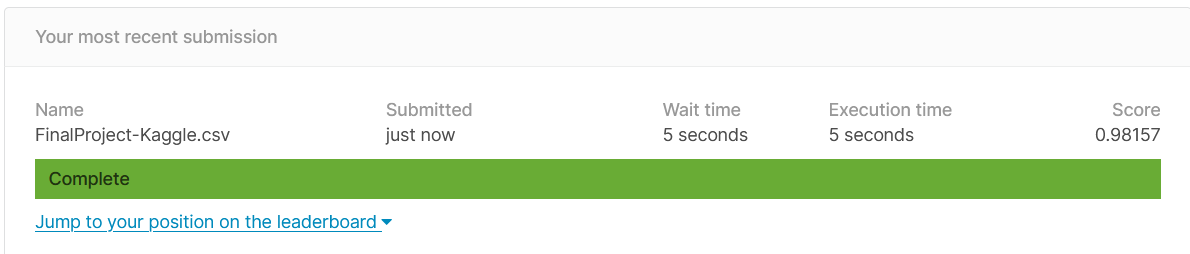